<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#Find-metamodules" data-toc-modified-id="Find-metamodules-4.1">Find metamodules</a></span><ul class="toc-item"><li><span><a href="#TPM-matrix" data-toc-modified-id="TPM-matrix-4.1.1">TPM matrix</a></span></li></ul></li><li><span><a href="#gene_module-df" data-toc-modified-id="gene_module-df-4.2">gene_module df</a></span></li><li><span><a href="#GO-df" data-toc-modified-id="GO-df-4.3">GO df</a></span><ul class="toc-item"><li><span><a href="#Deteremine-module-order-for-heatmap" data-toc-modified-id="Deteremine-module-order-for-heatmap-4.3.1">Deteremine module order for heatmap</a></span></li><li><span><a href="#term-list" data-toc-modified-id="term-list-4.3.2">term list</a></span></li><li><span><a href="#heatmap-annotation" data-toc-modified-id="heatmap-annotation-4.3.3">heatmap annotation</a></span></li><li><span><a href="#Corr-heatmap" data-toc-modified-id="Corr-heatmap-4.3.4">Corr heatmap</a></span></li></ul></li></ul></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(Hmisc)
library(ggplot2)
library(circlize)
library(ComplexHeatmap)
library(simplifyEnrichment)
library(WGCNA)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps

# Functions


# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"
mountpath <- "/Users/anabbi/Desktop/H4H/INDICATE/wgcna/th/"

# Main

In [4]:
load(file = paste0(datapath, "WGCNA/TH/Consensus-dataInput_Treehouse_tpm.RData"))

In [5]:
load(paste0(mountpath, "Consensus_Network_TH_manual_signed_20.RData"))

In [6]:
gene_module <- read.csv(file = paste0(datapath, "/WGCNA/TH/gene_module_treehouse_manual_signed_20.csv"),
                       header = T, stringsAsFactors = F,row.names = 1,check.names = F) 

In [7]:
GO_module <- read.csv(file = paste0(datapath, "WGCNA/TH/GO_TH_cons_manual_signed_20.csv"),
                       header = T, stringsAsFactors = F,row.names = 1,check.names = F) 

## Find metamodules

In [8]:
METree <- hclust(dist(t(consMEs[[1]]$data)), method = "average")

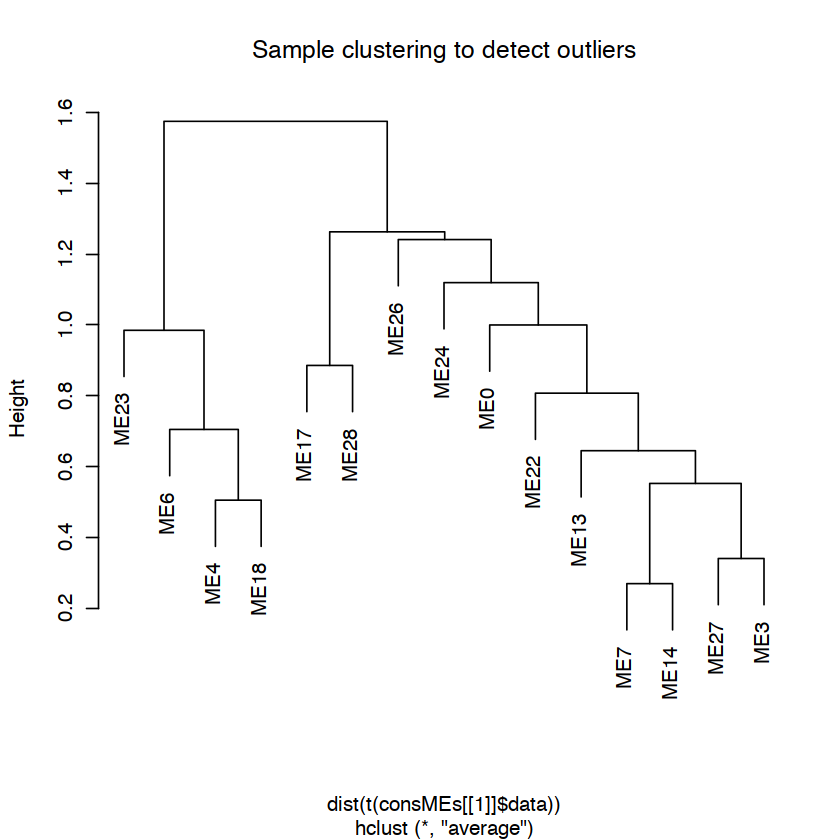

In [9]:
plot(METree, main = "Sample clustering to detect outliers")
#abline(h = 0.3, col = "red")

In [10]:
clust <- cutreeStatic(METree, cutHeight = 0.3, minSize = 2)

In [11]:
colnames(consMEs[[1]]$data)

[1] "ME23" "ME4"  "ME6"  "ME18" "ME26" "ME22" "ME27" "ME3"  "ME13" "ME24"
[11] "ME17" "ME28" "ME7"  "ME14" "ME0"

In [12]:
METree$labels

METree$order

[1] "ME23" "ME4"  "ME6"  "ME18" "ME26" "ME22" "ME27" "ME3"  "ME13" "ME24"
[11] "ME17" "ME28" "ME7"  "ME14" "ME0"

[1]  1  3  2  4 11 12  5 10 15  6  9 13 14  7  8

Compile all matrices together for plotting

On H4H:

mylistfiles <- list.files(getwd(), full.names = T, pattern = "tpm_th_")

allfiles <- lapply(mylistfiles, 
                   function(f){read.csv(f, header = TRUE, stringsAsFactors = F,
                                       row.names = 1,check.names = F)})

th_tpm_matrix_subset <- do.call(cbind, allfiles)

write.csv(gene_module, file = "th_tpm_matrix_subset.csv")

SCP to local

In [13]:
th_tpm_matrix_subset <- read.csv(file = paste0(datapath, "WGCNA/TH/th_tpm_matrix_subset.csv"),
                       header = T, stringsAsFactors = F,row.names = 1,check.names = F) 

In [14]:
dim(th_tpm_matrix_subset)

[1] 19014   835

In [15]:
th_tpm_matrix_subset[1:10,1:10]

,TH34_1240_S01,THR30_0855_S01,THR30_0839_S01,THR30_0819_S01,THR30_0836_S01,TH27_1247_S01,THR30_0865_S01,THR30_0806_S01,THR30_0808_S01,THR30_0821_S01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,4.60821785,5.03913839,5.26303441,5.90592848,4.64673870,5.79441587,2.12763328,5.5616316,5.57773093,5.32481060
A1BG-AS1,1.45417589,3.07038933,3.17951105,4.00000000,2.69376571,2.11436702,1.90689060,3.6814493,2.90110824,3.51222689
A1CF,0.02856915,0.01435529,0.02856915,0.01435529,0.00000000,0.00000000,0.02856915,0.0000000,0.02856915,0.01435529
A2M,5.17432652,7.43229134,5.97498811,5.63081315,6.49105138,6.20006486,3.91743176,6.3314544,7.11883728,7.48912543
A2M-AS1,0.32192809,0.68706069,0.83995959,1.62293035,0.66902677,0.49569516,0.17632277,0.3785116,0.43295941,1.02147973
A2ML1,1.61823866,0.74846123,4.13750352,3.10601324,0.02856915,0.23878686,0.21412481,1.5360529,3.31469653,0.02856915
A2MP1,0.09761080,0.21412481,0.16349873,0.08406426,0.11103131,0.05658353,0.01435529,0.1634987,0.20163386,0.05658353
A3GALT2,0.00000000,0.05658353,0.02856915,0.11103131,0.00000000,0.00000000,0.00000000,0.0976108,0.02856915,0.04264434
A4GALT,1.56559718,5.56590177,4.46139759,2.13422094,3.57893871,5.25096157,2.98002530,4.1210154,3.39506280,4.36667192


### TPM matrix

In [16]:
# Genes and samples included in wgcna analysis
goodGenes <- colnames(treehouse_gene_mat[[1]]$data)
goodsamples <- as.vector(unlist(lapply(treehouse_gene_mat, function(x){lapply(x, row.names)})))

In [17]:
# Match samples and genes included in wgcna with tpm matrix of all th data
samples <- match(goodsamples, colnames(th_tpm_matrix_subset))
genes <- match(goodGenes, rownames(th_tpm_matrix_subset))
tpm_genes_samples <- as.matrix(th_tpm_matrix_subset[genes, samples])
message("dim for original tpm matrix:")
print(dim(th_tpm_matrix_subset))
message("dim for tpm matrix used in wgcna:")
print(dim(tpm_genes_samples))

dim for original tpm matrix:



[1] 19014   835


dim for tpm matrix used in wgcna:



[1] 19010   757


## gene_module df

Clean up gene_module dataframe

In [18]:
head(gene_module)

,moduleLabel,moduleColor,ensembl_id_TH,ensembl_id,entrez
,<int>,<chr>,<chr>,<chr>,<int>
A1BG,0,grey,ENSG00000121410.11,ENSG00000121410,1
A1BG-AS1,0,grey,ENSG00000268895.5,ENSG00000268895,503538
A1CF,0,grey,ENSG00000148584.14,ENSG00000148584,29974
A2M,22,darkgreen,ENSG00000175899.14,ENSG00000175899,2
A2M-AS1,0,grey,ENSG00000245105.2,ENSG00000245105,144571
A2ML1,0,grey,ENSG00000166535.19,ENSG00000166535,144568


In [19]:
#remove grey module
gene_module <- gene_module[gene_module$moduleColor != "grey",]

In [20]:
dim(gene_module)

[1] 3044    5

In [21]:
table(gene_module$moduleColor)


        black         brown          cyan     darkgreen      darkgrey 
          332           228            85            44            33 
   darkorange darkturquoise        grey60    lightgreen           red 
           28            43           535            51          1162 
       salmon       skyblue         white        yellow 
           58            24            28           393 

In [22]:
gene_module$moduleLabel <- as.character(gene_module$moduleLabel)

In [23]:
gene_module[ gene_module$moduleLabel == '27',]

,moduleLabel,moduleColor,ensembl_id_TH,ensembl_id,entrez
,<chr>,<chr>,<chr>,<chr>,<int>
ACSL5,27,white,ENSG00000197142.10,ENSG00000197142,51703
APOL1,27,white,ENSG00000100342.20,ENSG00000100342,8542
APOL3,27,white,ENSG00000128284.19,ENSG00000128284,80833
APOL6,27,white,ENSG00000221963.5,ENSG00000221963,80830
B2M,27,white,ENSG00000166710.17,ENSG00000166710,567
CARD16,27,white,ENSG00000204397.7,ENSG00000204397,114769
CASP1,27,white,ENSG00000137752.22,ENSG00000137752,834
ETV7,27,white,ENSG00000010030.13,ENSG00000010030,51513
GBP4,27,white,ENSG00000162654.8,ENSG00000162654,115361


In [24]:
mygenes <- match(rownames(gene_module), rownames(tpm_genes_samples))
tpm_genes_samples <- tpm_genes_samples[mygenes,]
dim(tpm_genes_samples)

[1] 3044  757

## GO df

Clean up GO dataframe

In [25]:
# add module labels to GO data
labels_colors <- gene_module[ !duplicated(gene_module$moduleColor),c("moduleLabel", "moduleColor")]
GO_module$label <- NA
for(i in 1:nrow(labels_colors)){
    mycolor <- labels_colors$moduleColor[i]
    GO_module$label[GO_module$module == mycolor] <- labels_colors$moduleLabel[labels_colors$moduleColor == mycolor]
    }

In [26]:
GO_module <- GO_module[ GO_module$module != "grey",]
GO_module <- GO_module[ GO_module$termOntology == "BP",]
GO_module$label <- as.character(GO_module$label)

In [27]:
GO_module[ GO_module$label == '28',]

module,modSize,enrichmentP,BonferoniP,nModGenesInTerm,termOntology,termName,label
<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>


In [28]:
head(GO_module)

,module,modSize,enrichmentP,BonferoniP,nModGenesInTerm,termOntology,termName,label
,<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
GO:0016050,black,331,0.00000000000046,0.0000000085,31,BP,vesicle organization,7
GO:0010256,black,331,0.00000000000970,0.0000001800,34,BP,endomembrane system organization,7
GO:0042886,black,331,0.00000000003100,0.0000005800,80,BP,amide transport,7
GO:0015031,black,331,0.00000000003200,0.0000005800,78,BP,protein transport,7
GO:0046907,black,331,0.00000000007200,0.0000013000,72,BP,intracellular transport,7
GO:0015833,black,331,0.00000000008700,0.0000016000,78,BP,peptide transport,7


In [29]:
GO_module$enrichmentP <- round(GO_module$enrichmentP, 15)
GO_module$BonferoniP <- round(GO_module$BonferoniP, 15)

In [30]:
head(GO_module)

,module,modSize,enrichmentP,BonferoniP,nModGenesInTerm,termOntology,termName,label
,<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
GO:0016050,black,331,0.00000000000046,0.0000000085,31,BP,vesicle organization,7
GO:0010256,black,331,0.00000000000970,0.0000001800,34,BP,endomembrane system organization,7
GO:0042886,black,331,0.00000000003100,0.0000005800,80,BP,amide transport,7
GO:0015031,black,331,0.00000000003200,0.0000005800,78,BP,protein transport,7
GO:0046907,black,331,0.00000000007200,0.0000013000,72,BP,intracellular transport,7
GO:0015833,black,331,0.00000000008700,0.0000016000,78,BP,peptide transport,7


### Deteremine module order for heatmap

based on module clustering

In [31]:
orderedlabels <- METree$labels[METree$order]

In [32]:
orderedlabels

[1] "ME23" "ME6"  "ME4"  "ME18" "ME17" "ME28" "ME26" "ME24" "ME0"  "ME22"
[11] "ME13" "ME7"  "ME14" "ME27" "ME3"

In [33]:
orderedlabels <- as.character(substring(orderedlabels,3))

In [34]:
orderedlabels <- orderedlabels[orderedlabels != "0"]

In [35]:
orderedlabels

[1] "23" "6"  "4"  "18" "17" "28" "26" "24" "22" "13" "7"  "14" "27" "3"

Module 28 is ZNF genes with no BP annotations from GO

In [36]:
orderedlabels <- orderedlabels[c(3,4,5,6,2,11,12,8,1,13,14,10,9,7)]

In [37]:
orderedlabels

[1] "4"  "18" "17" "28" "6"  "7"  "14" "24" "23" "27" "3"  "13" "22" "26"

In [38]:
#Make a vector for module labels
modulelabels <- as.character(gene_module$moduleLabel)
names(modulelabels) <- rownames(gene_module)

In [39]:
modulelabels <- modulelabels[order(match(modulelabels, orderedlabels))]

In [40]:
table(modulelabels)

modulelabels
  13   14   17   18   22   23   24   26   27   28    3    4    6    7 
  58   85  535   51   44   43   33   28   28   24  228  393 1162  332 

order tpm matrix

In [41]:
tpm_genes_samples <- tpm_genes_samples[names(modulelabels),]

In [42]:
head(tpm_genes_samples)

,THR09_0224_S01,THR22_0599_S01,THR22_0582_S01,THR22_0595_S01,THR09_0568_S01,TH03_0148_S01,THR09_0563_S01,THR09_0574_S01,THR22_0579_S01,THR09_0561_S01,⋯,THR30_0810_S01,THR30_0823_S01,TH06_1171_S01,THR30_0842_S01,TH27_0691_S01,TH03_0014_S01,THR30_0824_S01,THR30_0818_S01,THR32_0947_S01,TH40_2259_S01
AGBL5,3.420887,3.491853,3.607626,3.182692,3.527321,3.589763,3.919340,3.794936,3.440952,4.336997,⋯,5.501121,5.890933,5.696828,4.120186,5.686220,5.495695,5.347311,4.615299,4.886062,4.531693
ALYREF,7.041440,6.946614,6.703073,5.418865,6.601102,5.499846,7.766131,6.913009,5.969703,7.683556,⋯,6.974300,5.860466,5.926711,5.675816,6.067596,5.420213,6.346248,5.200850,6.160073,5.774524
ANLN,4.031219,4.175525,4.440288,3.804260,4.305241,2.855990,4.266037,4.502076,3.748461,5.037382,⋯,5.175525,4.894818,3.467279,3.754888,5.236875,5.139142,4.960697,2.689299,4.094236,3.333424
ANP32A,8.712458,8.848279,9.266669,8.046360,8.766396,7.251814,8.308612,8.966246,8.247405,7.902677,⋯,7.876394,7.880869,7.065120,6.938991,7.855367,8.020813,7.031880,6.644722,7.533096,8.115616
ANP32B,8.521247,9.061938,8.877131,7.657640,9.144964,6.865795,8.302776,8.840935,8.228723,8.526499,⋯,7.526382,7.307337,7.012569,7.257482,6.599764,6.360715,7.229396,6.554282,7.303963,7.646091
ANP32E,6.732676,7.146696,7.042535,5.615593,6.770961,4.751142,7.154211,7.379985,6.424754,6.616622,⋯,6.002928,5.994806,4.370164,5.296090,5.177121,6.453682,6.050502,4.687621,5.771357,5.596041


### term list

Make a list for word cloud annotation

In [43]:
head(modulelabels)

AGBL5 ALYREF   ANLN ANP32A ANP32B ANP32E 
   "4"    "4"    "4"    "4"    "4"    "4"

In [44]:
head(GO_module,15)

,module,modSize,enrichmentP,BonferoniP,nModGenesInTerm,termOntology,termName,label
,<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
GO:0016050,black,331,0.00000000000046,0.0000000085,31,BP,vesicle organization,7
GO:0010256,black,331,0.00000000000970,0.0000001800,34,BP,endomembrane system organization,7
GO:0042886,black,331,0.00000000003100,0.0000005800,80,BP,amide transport,7
GO:0015031,black,331,0.00000000003200,0.0000005800,78,BP,protein transport,7
GO:0046907,black,331,0.00000000007200,0.0000013000,72,BP,intracellular transport,7
GO:0015833,black,331,0.00000000008700,0.0000016000,78,BP,peptide transport,7
GO:0006955,brown,224,0.00000000000000,0.0000000000,155,BP,immune response,3
GO:0002376,brown,224,0.00000000000000,0.0000000000,164,BP,immune system process,3
GO:0002682,brown,224,0.00000000000000,0.0000000000,112,BP,regulation of immune system process,3


Use GO term that includes highest number of genes in each module

In [45]:
GO_module$myterm <- NA

In [46]:
unique(GO_module$label)

[1] "7"  "3"  "14" "22" "24" "26" "23" "17" "18" "6"  "13" "27" "4"

In [47]:
for(i in unique(GO_module$label)){
    tmp <- GO_module[ GO_module$label == i,]
    moduleterm <- tmp$termName[tmp$nModGenesInTerm == max(tmp$nModGenesInTerm)][1] #use one term if max returns two terms
    GO_module$myterm[GO_module$label == i] <- moduleterm
    
}

In [48]:
GOlist <- vector(mode = "list", length = length(modulelabels))
names(GOlist) <- modulelabels

In [49]:
for(m in 1:length(GOlist)){
    mymodule <- names(GOlist)[m]
    myGOs <- GO_module$termName[GO_module$label == mymodule]
    GOlist[m] <- list(myGOs)}

### heatmap annotation

In [50]:
head(modulelabels)

AGBL5 ALYREF   ANLN ANP32A ANP32B ANP32E 
   "4"    "4"    "4"    "4"    "4"    "4"

In [51]:
module_ha <- rowAnnotation(go = anno_word_cloud_from_GO(modulelabels, moduleList,term = GOlist,
                                                       max_words = 30, fontsize_range = c(25,45),
                                                       exclude_words = c("cellular", "process", "cell",
                                                                         "exogenous", "system" ),
                                                       bg_gp = gpar(fill = "#F1F1F1", col = "#AAAAAA"),
                          word_cloud_grob_param = list(line_space = unit(2, "pt"), word_space = unit(4, "pt"), 
                                                       col = "black", max_width = unit(200, "mm"))
                                                       )
                          )

In [52]:
set.seed(8)
myColors <- randomcoloR::distinctColorPalette(14)

In [53]:
names(myColors) <- names(table(modulelabels))

In [54]:
hm_modules <- Heatmap(modulelabels,
                      #titles and names
                      right_annotation = module_ha,
                      name = "Modules",
                      show_row_names = FALSE,
                      show_column_names = FALSE,    
                      #clusters
                      cluster_columns = FALSE,
                      cluster_rows = FALSE,
                      #aesthestics
                      col = myColors,
                      row_names_gp = gpar(fontsize = 20),
                      width = unit(1, "cm"),
                      column_title_gp = gpar(fontsize = 42),
                      row_title = NULL)

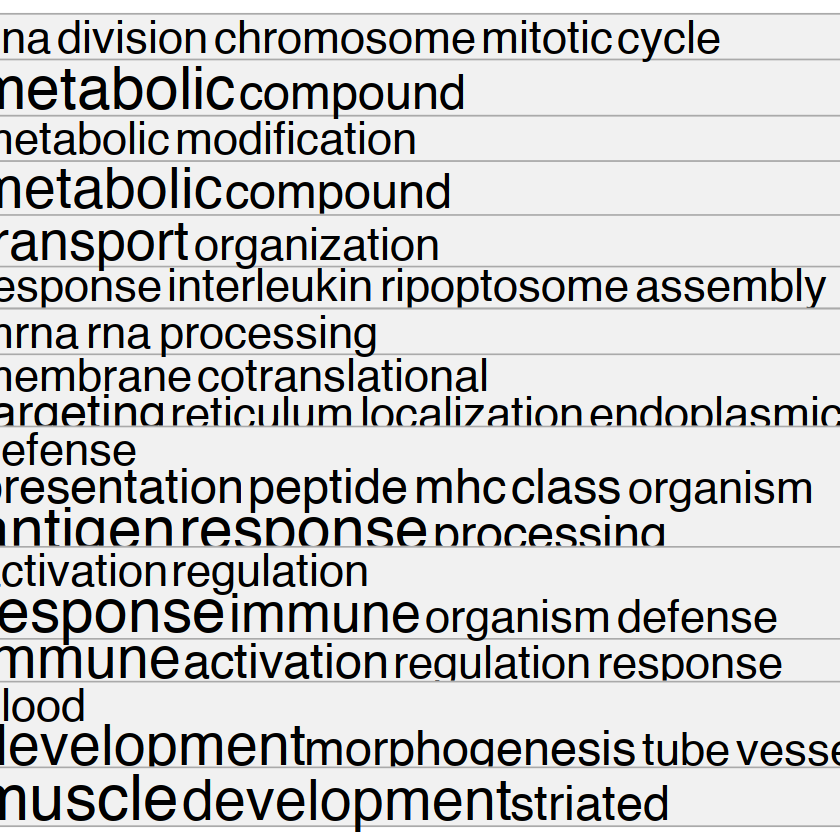

In [55]:
hm_modules

### Corr heatmap

In [56]:
# make a correlation matrix 
cor_mat <- rcorr(t(tpm_genes_samples), type = "pearson")

In [57]:
col_fun <- colorRamp2(c(-1, 0, 1), c("blue","white", "red"))
hm_cor <- Heatmap(cor_mat$r,
                      #titles and names   
                      name = "Gene correlations",   
                      show_row_names = FALSE,
                      show_column_names = FALSE,     
                      #clusters and orders  
                      cluster_columns = FALSE,
                      cluster_rows =  FALSE,
                      show_column_dend = FALSE,
               #       row_dend_width = unit(8, "cm"),
                      #aesthestics
                      col = col_fun, 
                      column_names_gp = gpar(fontsize = 20),
                      row_names_gp = gpar(fontsize = 20),
                      column_title_gp = gpar(fontsize = 20),
                      column_title = NULL,
                      row_title = NULL, use_raster = TRUE,
                 raster_quality = 5)

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



In [58]:
pdf(file = paste0(plotpath,"hm_modules_th_manual_signed20_annotations.pdf"),
    width = 30, 
    height = 20,
    useDingbats = FALSE)
draw(hm_cor + hm_modules)
    dev.off()

pdf 
  2

In [59]:
hm_modules <- Heatmap(modulelabels,
                      #titles and names
                      name = "Modules",
                      show_row_names = FALSE,
                      show_column_names = FALSE,    
                      #clusters
                      cluster_columns = FALSE,
                      cluster_rows = FALSE,
                      #aesthestics
                      col = myColors,
                      row_names_gp = gpar(fontsize = 20),
                      width = unit(1, "cm"),
                      column_title_gp = gpar(fontsize = 42),
                      row_title = NULL)

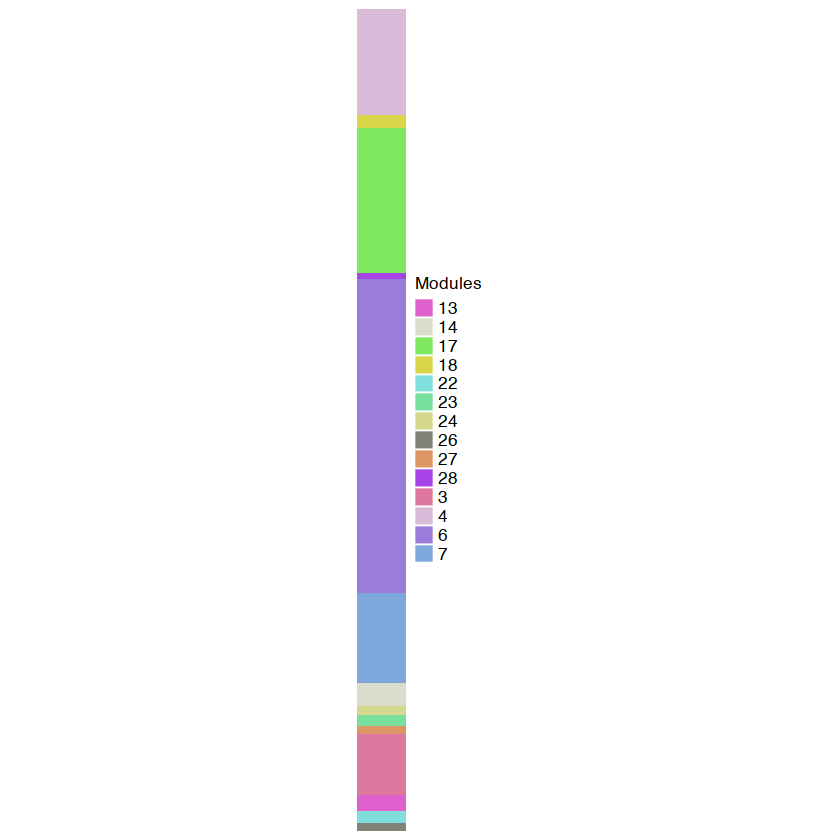

In [61]:
hm_modules

In [62]:
pdf(file = paste0(plotpath,"hm_modules_th_manual_signed20.pdf"),
    width = 20, 
    height = 20,
    useDingbats = FALSE)
draw(hm_cor + hm_modules)
    dev.off()

pdf 
  2